# Lab #3

Data exploration is a crucial step in the AI/ML pipeline. Before we dive into complex algorithms, we need to understand the basics of our dataset. This process involves:

- Summarizing the main characteristics of the dataset
- Detecting any anomalies or outliers that may affect model performance
- Unveiling the structure and patterns in the data by visualizing 

We will use these Python librares: pandas for data exploration, matplotlib and seaborn for visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

/var/folders/63/4pgswjr50bn64058t7d156v80000gn/T/ipykernel_99109/1127725073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Loading

- Here, we load the Iris dataset using Pandas. We use the 'head', 'info', and 'describe' methods to get an initial understanding of the dataset's structure, data types, and some basic statistical details.

In [2]:
# Load the dataset
df = pd.read_csv('data/iris_dataset.csv')

# Initial exploration
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   147 non-null    float64
 2   petal length (cm)  147 non-null    float64
 3   petal width (cm)   148 non-null    float64
 4   target             149 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        147.000000         147.000000   
mean            5.849664          3.060544           3.744898   
std             0.827208          0.438640           1.779879   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.550000   
50%             5.800000          3.000000           4.400000   
75%             6.400000          3.350000           5.10000

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Data Cleaning and Preprocessing

- Missing values can significantly affect the performance of ML models. We handle them by imputing using the mean of each column. This is a simple strategy, but there are more sophisticated methods available. Normalization is crucial when features have different scales, as it standardizes the range of independent variables.

In [3]:
# Handling missing values - Simple Imputation
df.fillna(df.mean(), inplace=True)

# Check if there are any missing values left
print(df.isna().sum())

# Normalization (if necessary)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('target', axis=1)), columns=df.columns[:-1])
df_scaled['target'] = df['target']
df_scaled

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.912361,1.015491,-1.335373,-1.330302,0.0
1,-1.155766,-0.139905,-1.335373,-1.330302,0.0
2,-1.399172,0.322253,-1.392321,-1.330302,0.0
3,-1.520874,0.091174,-1.278425,-1.330302,0.0
4,-1.034064,1.246570,-1.335373,-1.330302,0.0
...,...,...,...,...,...
145,1.034881,-0.139905,0.828652,1.463332,2.0
146,0.548070,-1.295301,0.714756,0.931211,2.0
147,0.791475,-0.139905,0.828652,1.064241,2.0
148,0.426368,0.784412,0.942548,1.463332,2.0


## Descriptive Statistical Analysis

- Descriptive statistics provide important insights into the data. Mean and median offer information about the central tendency, while standard deviation tells us about the spread of the data. These metrics are foundational for understanding any dataset.

In [4]:
# Basic statistics
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Standard Deviation:\n", df.std())

Mean:
 sepal length (cm)    5.849664
sepal width (cm)     3.060544
petal length (cm)    3.744898
petal width (cm)     1.200000
target               0.993289
dtype: float64
Median:
 sepal length (cm)    5.8
sepal width (cm)     3.0
petal length (cm)    4.3
petal width (cm)     1.3
target               1.0
dtype: float64
Standard Deviation:
 sepal length (cm)    0.824428
sepal width (cm)     0.434202
petal length (cm)    1.761870
petal width (cm)     0.754227
target               0.815098
dtype: float64


## Data Visualization

- Visualization is key to understanding the distribution and relationship between variables. Histograms show the distribution of each feature, box plots highlight outliers, and scatter plots (using pairplot) reveal the relationships between pairs of features, colored by the target variable.

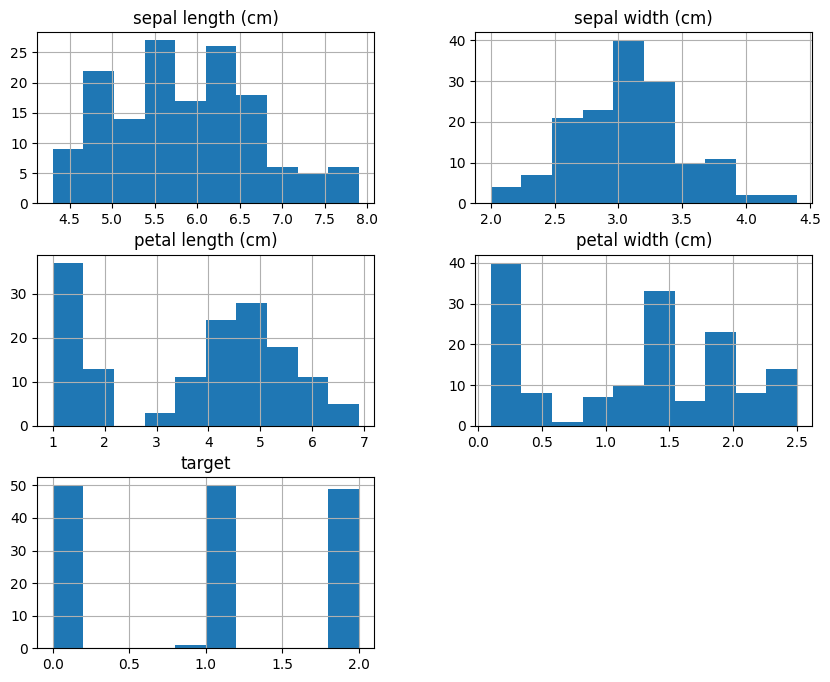

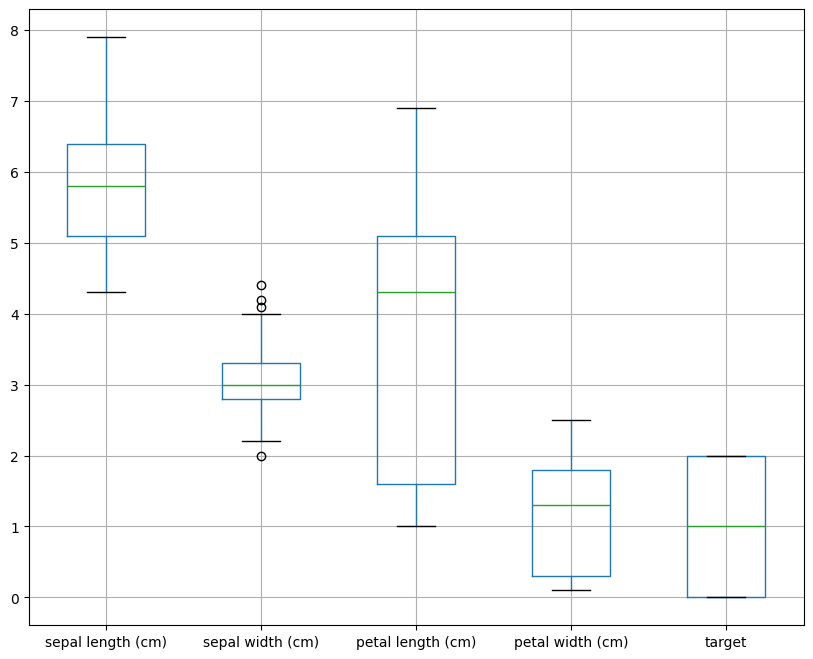

/Users/hakan/Desktop/INTRO TO AI /venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hakan/Desktop/INTRO TO AI /venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/hakan/Desktop/INTRO TO AI /venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

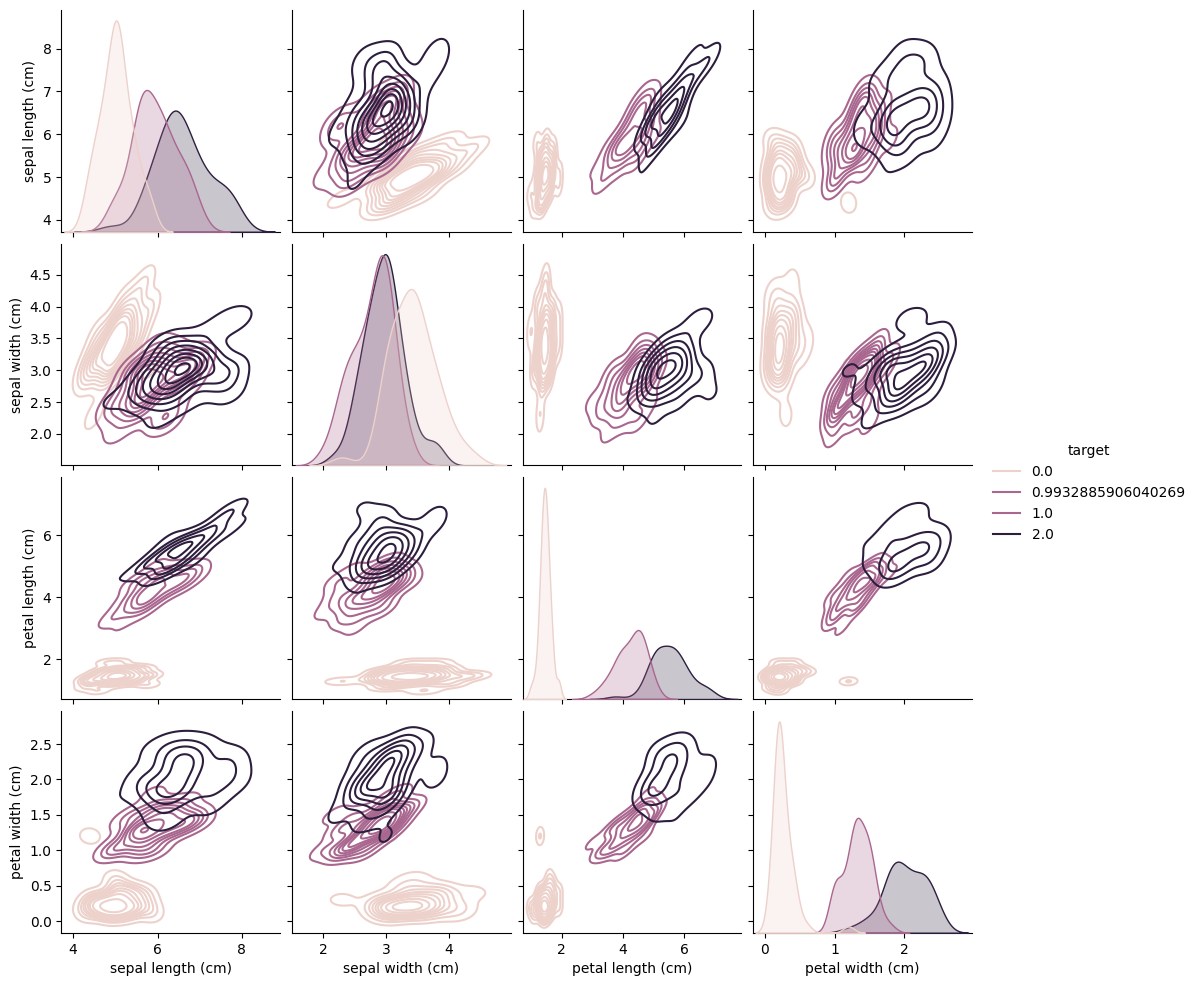

In [5]:
# Histograms for feature distributions
df.hist(figsize=(10, 8))
plt.show()

# Box plots to identify outliers
df.boxplot(figsize=(10, 8))
plt.show()

# Scatter plot (advanced)
sns.pairplot(df, hue='target', kind="kde")
plt.show()


## Conclusion

- 